In [1]:
import numpy as np

import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

from scipy import stats

matplotlib.rc('font', family = "NanumGothic")
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
df_order = pd.read_csv("log_order_sheet_001.csv")

df_order = df_order.drop(["Unnamed: 0"], axis = 1)
df_order

/home/piai/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,결제수단,공급원가,교환구분,네이버 포인트,배송번호,배송비 정보,배송시작일,배송완료일,사용한 적립금액,상품구매금액,...,주문자ID,카드사,쿠폰 할인금액,판매가,품목번호,친환경,사은품,회원,주문수량,총수량
0,무통장입금,44550.0,교환안함,0,D-20181227-0000648-00,무료,2019-01-07 오전 8:56,2019-01-11 오전 5:32,0,71450,...,pp683,기타,0,71450,42602,False,False,True,1,300
1,무통장입금,44000.0,교환안함,0,D-20181229-0000119-00,무료,2019-01-03 오전 9:30,2019-01-07 오전 5:32,0,141240,...,asd0908,기타,0,70620,42930,False,False,True,2,2000
2,무통장입금,6820.0,교환안함,0,D-20181230-0000100-00,무료,2019-01-03 오전 9:30,2019-01-07 오전 5:32,0,13910,...,NaN,기타,0,13910,42998,False,False,False,1,200
3,무통장입금,49500.0,교환안함,0,D-20181231-0000087-00,무료,2019-01-03 오전 9:30,2019-01-07 오전 5:32,0,81600,...,23533593@n,기타,0,81600,43063,False,False,True,1,300
4,무통장입금,61600.0,교환안함,0,D-20181231-0000108-00,무료,2019-01-07 오전 8:56,2019-01-11 오전 5:32,0,94710,...,romandoll,기타,0,94710,43066,False,False,True,1,400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46744,카드,36300.0,교환안함,0,D-20171229-0000036-00,무료,2017-12-29 오후 4:32,2018-01-02 오전 5:31,0,52800,...,73987748@n,국민,0,52800,3170,False,False,True,1,200
46745,카드,36300.0,교환안함,0,D-20171229-0000043-00,무료,2018-01-03 오전 9:45,2018-01-07 오전 5:38,0,112200,...,chuheesuk,비씨,0,56100,3172,False,False,True,2,400
46746,카드,22280.0,교환안함,300,D-20171230-0000022-01,무료,2018-01-02 오후 7:06,2018-01-11 오전 2:46,0,36000,...,NaN,기타,0,36000,3177,False,False,False,1,1500
46747,카드,55000.0,교환안함,320,D-20171231-0000017-01,무료,2018-01-03 오후 2:00,2018-01-06 오후 6:06,0,73460,...,NaN,기타,0,73460,3178,False,False,False,1,400


In [16]:
df_order.columns

Index(['결제수단', '공급원가', '교환구분', '네이버 포인트', '배송번호', '배송비 정보', '배송시작일', '배송완료일',
       '사용한 적립금액', '상품구매금액', '상품명', '상품번호', '상품별 추가할인금액', '수령인 주소', '주문경로',
       '주문번호', '주문일시', '주문자ID', '카드사', '쿠폰 할인금액', '판매가', '품목번호', '친환경', '사은품',
       '회원', '주문수량', '총수량'],
      dtype='object')

In [17]:
df_order["주문자ID"]

0             pp683
1           asd0908
2               NaN
3        23533593@n
4         romandoll
            ...    
46744    73987748@n
46745     chuheesuk
46746           NaN
46747           NaN
46748      rmxehfdl
Name: 주문자ID, Length: 46749, dtype: object

In [20]:
contains_flag = df_order["주문자ID"].str.contains("packus")

df_order["관리자"] = contains_flag

In [33]:
df_order["영업이익"] = df_order["상품구매금액"] - df_order["공급원가"] * df_order["주문수량"]

df_관리자 = df_order[df_order["관리자"] == True]
df_회원 = df_order[df_order["관리자"] == False]
df_비회원 = df_order[df_order["관리자"].isnull()]

#df_관리자
#df_비관리자

In [34]:
관리자영업이익 = df_관리자["영업이익"].sum()
회원영업이익 = df_회원["영업이익"].sum()
비회원영업이익 = df_비회원["영업이익"].sum()

In [ ]:
df_order.boxplot(column="영업이익",by="회원")

<function matplotlib.pyplot.show(*args, **kw)>

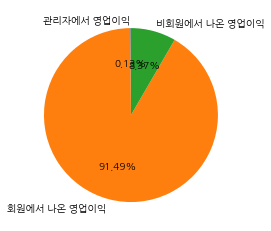

In [35]:
총영업이익 = 관리자영업이익 + 회원영업이익 + 비회원영업이익

labels = ["관리자에서 영업이익", "회원에서 나온 영업이익", "비회원에서 나온 영업이익"]
ratio = [관리자영업이익/총영업이익, 회원영업이익/총영업이익, 비회원영업이익/총영업이익]

plt.pie(ratio, labels= labels, autopct = "%1.2f%%", shadow= False, startangle= 90)
plt.show

<BarContainer object of 3 artists>

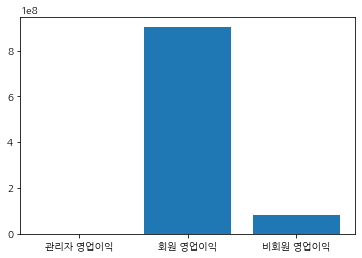

In [38]:
영업이익_x = ["관리자 영업이익", "회원 영업이익", "비회원 영업이익"]
영업이익_y = [관리자영업이익, 회원영업이익, 비회원영업이익]

plt.bar(영업이익_x, 영업이익_y)